QUESTION ONE

In [1]:
#importing the dependancies
import pandas as pd
import numpy as np

In [2]:
#specifying the path directory of the data set

df = pd.read_excel('Franchise_Dataset_1.xlsx')

In [3]:
#data_understanding
print(df.head())
print(df.tail())

print(df.sample)

   Net Profit  Counter Sales  Drive-through Sales  Business Type  Unnamed: 4  \
0         2.0            8.4                  7.7              1         NaN   
1         1.3            3.3                  4.5              1         NaN   
2         1.2            5.8                  8.4              2         NaN   
3         2.4           10.0                  7.8              3         NaN   
4         0.7            4.7                  2.4              1         NaN   

     Unnamed: 5  Unnamed: 6  
0          Café         1.0  
1   Pizza Store         2.0  
2  Burger store         3.0  
3           NaN         NaN  
4           NaN         NaN  
    Net Profit  Counter Sales  Drive-through Sales  Business Type  Unnamed: 4  \
95         1.8            7.7                  4.8              3         NaN   
96         0.6            4.5                  2.5              2         NaN   
97         1.3            9.1                  3.4              2         NaN   
98         1.0 

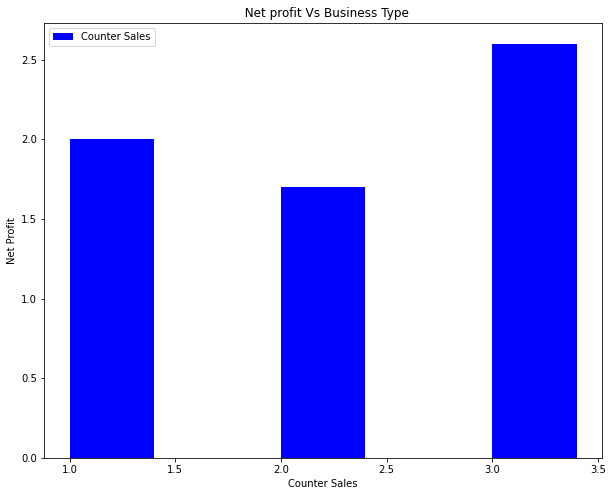

In [4]:
#data visualization
import matplotlib.pyplot as plt
plt.figure(figsize=(10,8))
plt.bar(df['Business Type'],df['Net Profit'],color='blue',align='edge', width=0.4)
plt.legend(['Counter Sales'])
plt.title('  Net profit Vs Business Type')
plt.xlabel('Counter Sales')
plt.ylabel('Net Profit')
plt.show()

Text(0.5, 1.0, 'Pie Chart showing Net profit')

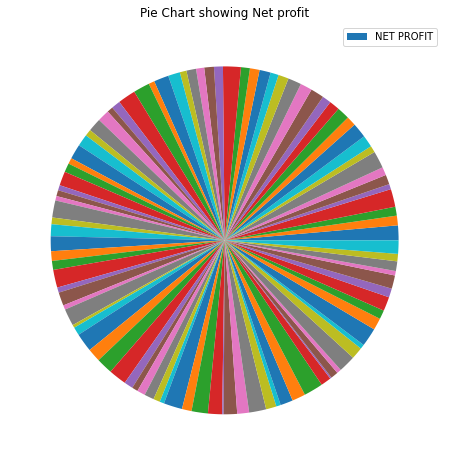

In [5]:
plt.figure(figsize=(10,8))
plt.pie(df['Net Profit'])
plt.legend(['NET PROFIT'])
plt.title('Pie Chart showing Net profit')

In [6]:

plt.show()

In [7]:
#checking data types
print(df.dtypes)

Net Profit             float64
Counter Sales          float64
Drive-through Sales    float64
Business Type            int64
Unnamed: 4             float64
Unnamed: 5              object
Unnamed: 6             float64
dtype: object


In [8]:
#checking for missing values that maybe present in the data set
print(df.isna().sum())

Net Profit               0
Counter Sales            0
Drive-through Sales      0
Business Type            0
Unnamed: 4             100
Unnamed: 5              97
Unnamed: 6              97
dtype: int64


In [9]:
data_frame= df.drop(columns=['Unnamed: 4', 'Unnamed: 5', 'Unnamed: 6'])
print(data_frame.columns)
# appending the float continuos values to integers
data_frame['Net Profit'] = data_frame['Net Profit'].astype(int)
data_frame['Counter Sales'] = data_frame['Counter Sales'].astype(int)
data_frame['Drive-through Sales'] = data_frame['Drive-through Sales'].astype(int)
print(data_frame)

Index(['Net Profit', 'Counter Sales', 'Drive-through Sales', 'Business Type'], dtype='object')
    Net Profit  Counter Sales  Drive-through Sales  Business Type
0            2              8                    7              1
1            1              3                    4              1
2            1              5                    8              2
3            2             10                    7              3
4            0              4                    2              1
..         ...            ...                  ...            ...
95           1              7                    4              3
96           0              4                    2              2
97           1              9                    3              2
98           1              5                    2              1
99           1              6                    4              3

[100 rows x 4 columns]


In [10]:
#fitting splitting and training data
#creating x and y data matrices
x = data_frame.drop(columns = 'Net Profit')
y = data_frame['Net Profit']
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y, random_state=89,test_size=0.3)


In [11]:
#building a neural network model
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
from sklearn.metrics import accuracy_score

In [12]:
#Modelling and compiling
model = Sequential()

model.add(Dense(units=20,activation='tanh'))
model.add(Dense(units=20,activation='tanh'))
model.add(Dense(units=20,activation='tanh'))

model.compile(loss='binary_crossentropy',optimizer='sgd',metrics='accuracy')

In [13]:
#fitting
model.fit(x_train,y_train,epochs=200,verbose=2)


Epoch 1/200
3/3 - 1s - loss: 8.0474 - accuracy: 0.0000e+00 - 523ms/epoch - 174ms/step
Epoch 2/200
3/3 - 0s - loss: 7.5365 - accuracy: 0.0000e+00 - 11ms/epoch - 4ms/step
Epoch 3/200
3/3 - 0s - loss: 7.4899 - accuracy: 0.0000e+00 - 11ms/epoch - 4ms/step
Epoch 4/200
3/3 - 0s - loss: 7.4600 - accuracy: 0.0000e+00 - 13ms/epoch - 4ms/step
Epoch 5/200
3/3 - 0s - loss: 7.4415 - accuracy: 0.0000e+00 - 8ms/epoch - 3ms/step
Epoch 6/200
3/3 - 0s - loss: 7.4215 - accuracy: 0.0000e+00 - 8ms/epoch - 3ms/step
Epoch 7/200
3/3 - 0s - loss: 7.4015 - accuracy: 0.0000e+00 - 13ms/epoch - 4ms/step
Epoch 8/200
3/3 - 0s - loss: 7.3881 - accuracy: 0.0000e+00 - 10ms/epoch - 3ms/step
Epoch 9/200
3/3 - 0s - loss: 7.3738 - accuracy: 0.0000e+00 - 12ms/epoch - 4ms/step
Epoch 10/200
3/3 - 0s - loss: 7.3617 - accuracy: 0.0000e+00 - 11ms/epoch - 4ms/step
Epoch 11/200
3/3 - 0s - loss: 7.3511 - accuracy: 0.0000e+00 - 9ms/epoch - 3ms/step
Epoch 12/200
3/3 - 0s - loss: 7.3411 - accuracy: 0.0000e+00 - 9ms/epoch - 3ms/step
Ep

In [14]:
#making the prediction
print(model.predict(x_test))
y_pred = model.predict(x_test)


[[ 0.976213    0.96573156  0.94149387  0.92803276 -0.37148517  0.9443244
   0.9509746   0.9413416   0.97168    -0.49641448  0.9297337   0.98047966
   0.94370866  0.9600409   0.9492872   0.9634332  -0.3499794   0.957015
  -0.52237934 -0.39697686]
 [ 0.969869    0.97257644  0.9625804   0.95683116 -0.3448235   0.94825363
   0.95960593  0.95893145  0.97197765 -0.5201563   0.9525063   0.9895004
   0.967042    0.96413416  0.9565679   0.9560403  -0.2544638   0.97596323
  -0.5400059  -0.5276358 ]
 [ 0.97343224  0.9277175   0.91764975  0.85694915 -0.45165902  0.93580455
   0.9255281   0.83853775  0.9489544  -0.47484726  0.85687375  0.96014535
   0.84745896  0.94862485  0.93275833  0.95988595 -0.41076213  0.90408784
  -0.4142594  -0.30593392]
 [ 0.9555768   0.9354236   0.9071514   0.830408   -0.36444104  0.92220545
   0.9373101   0.8602218   0.94107425 -0.44149658  0.8160575   0.9572197
   0.859405    0.944501    0.94481945  0.9560347  -0.35462362  0.925476
  -0.41365492 -0.48418024]
 [ 0.963318

QUESTION 2

In [15]:
a = 500000
b = 700000
pizza = 2 #pizza franchise was converted into a 2 using label encoding
values_to_predict = {'Counter Sales':a, 'Drive-through Sales':b, 'Business Type':pizza}
#appending the values to predict into a dataframe
data = pd.DataFrame(values_to_predict,index=[0])
print(data)
print("The value of forecasted value will be ", model.predict(data).astype(float))



   Counter Sales  Drive-through Sales  Business Type
0         500000               700000              2
The value of forecasted value will be  [[ 0.97525364  0.98317081  0.9610278   0.96250761 -0.32126123  0.95377856
   0.96750093  0.97452289  0.97976524 -0.58860421  0.96285933  0.99095351
   0.9763208   0.96505457  0.97120667  0.97316855 -0.17775209  0.98496473
  -0.67851013 -0.53175414]]


The model was able to make the above predictions. The above numbers are stored in an array where they in millions. The negative values as seen in the prediction are as a result of using the tanh as an activation function that covers for both positive and negative values. The input layer had 20 nodes followed by one hidden layer with 20 nodes and the output layer having 20 nodes also.

QUESTION 3
•	Neural networks are mainly based on hardware dependance. This usually applies for libraries such as TensorFlow that employs graphical processor unit that are mainly used for their paralle processing power configuration before setting up

# New Section